## KNN 연습문제

### 인도의 간질환자 예측 모델  
- 사용 데이터 세트 : 인도의 간질환자 데이터 (indian_liver_patient.csv)
- 데이터 세트 분리 : 테스트용(평가용) 데이터 세트 
- 사용하는 ML 알고리즘 : KNN 알고리즘  
- 모델 평가 : 예측 성능 평가   
    - 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
liver_df = pd.read_csv('../data/indian_liver_patient.csv')
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
liver_df.describe()
# Albumin_and_Globulin_Ratio에서 결측치가 존재한다
# 근데 4개밖에 없으니 삭제해도 괜찮지 않을까?

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### 데이터 확인작업

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

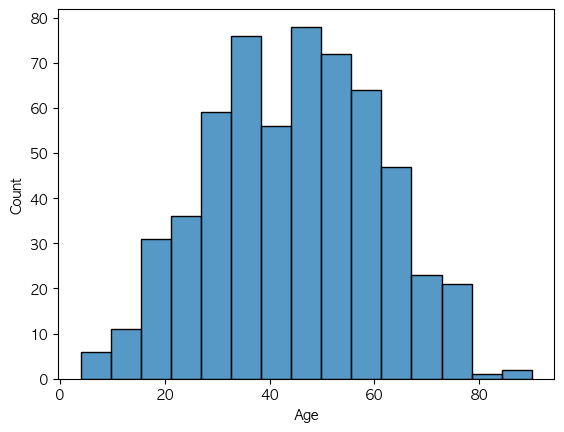

<Axes: xlabel='Gender', ylabel='Count'>

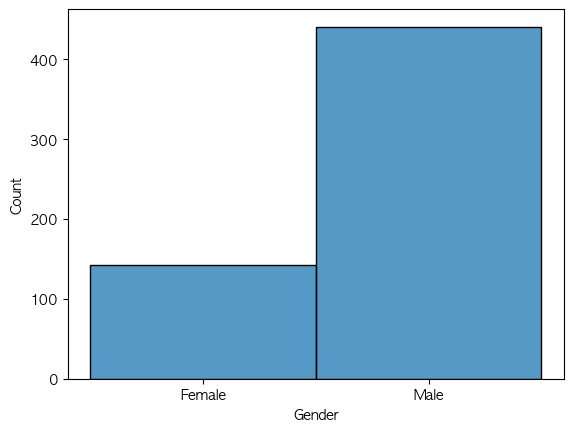

<Axes: xlabel='Total_Bilirubin', ylabel='Count'>

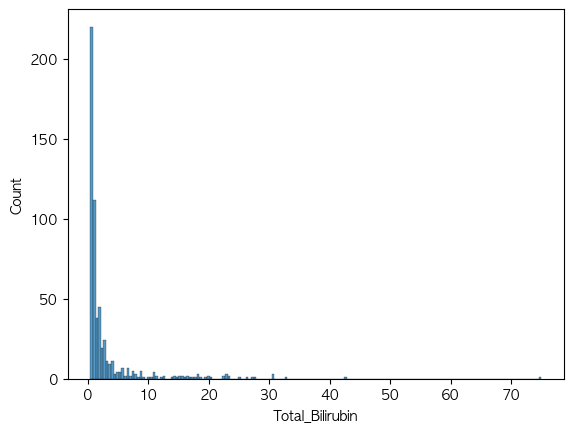

<Axes: xlabel='Direct_Bilirubin', ylabel='Count'>

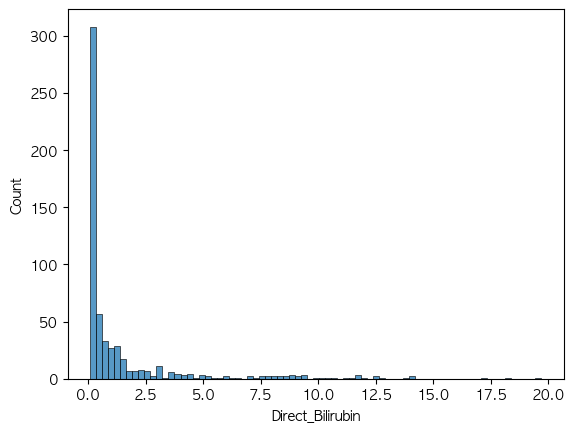

<Axes: xlabel='Alkaline_Phosphotase', ylabel='Count'>

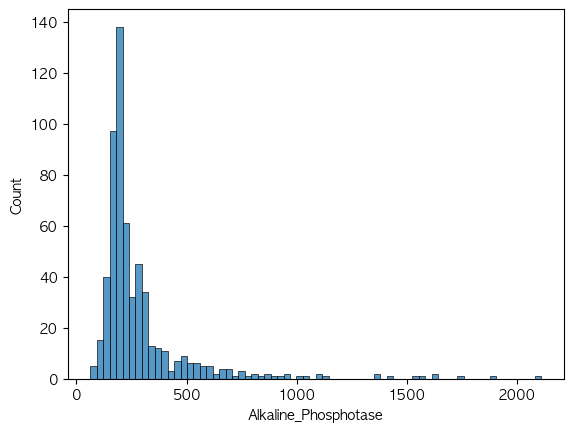

<Axes: xlabel='Alamine_Aminotransferase', ylabel='Count'>

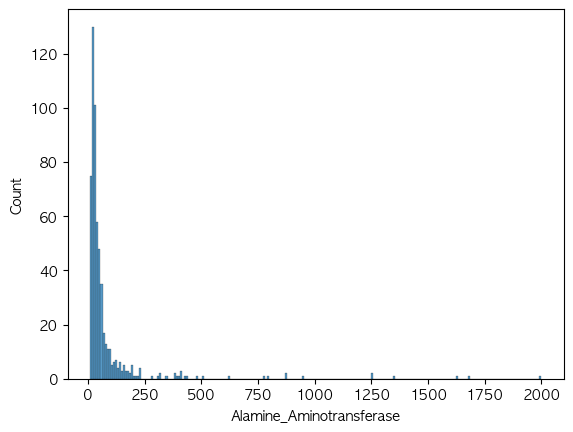

<Axes: xlabel='Aspartate_Aminotransferase', ylabel='Count'>

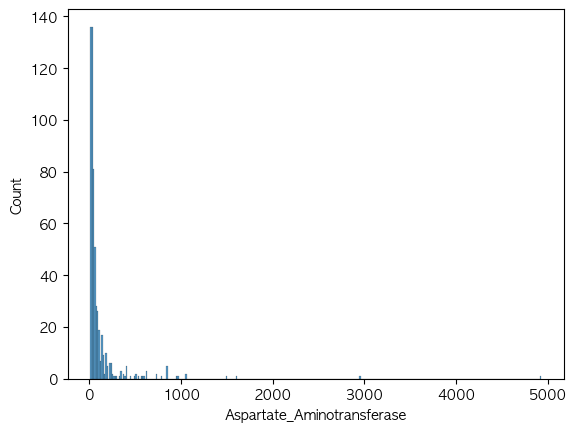

<Axes: xlabel='Total_Protiens', ylabel='Count'>

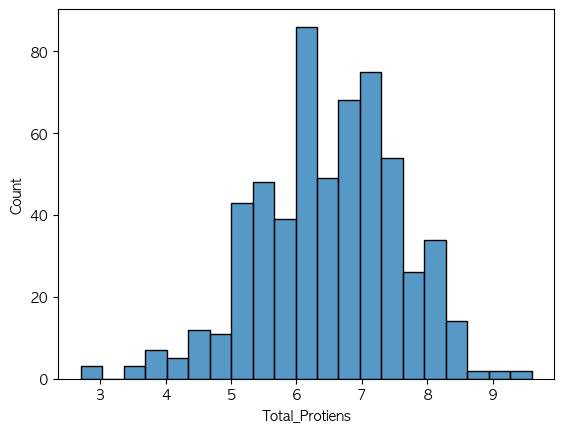

<Axes: xlabel='Albumin', ylabel='Count'>

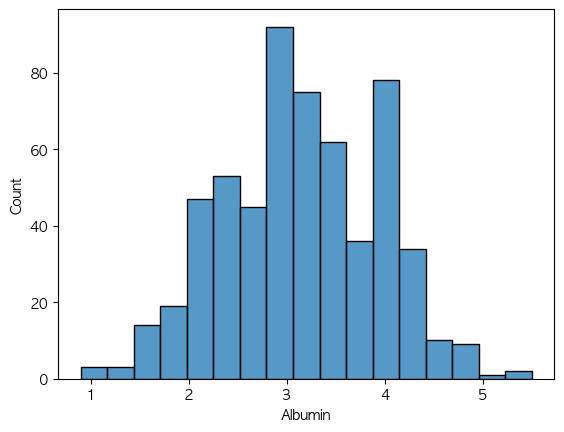

<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Count'>

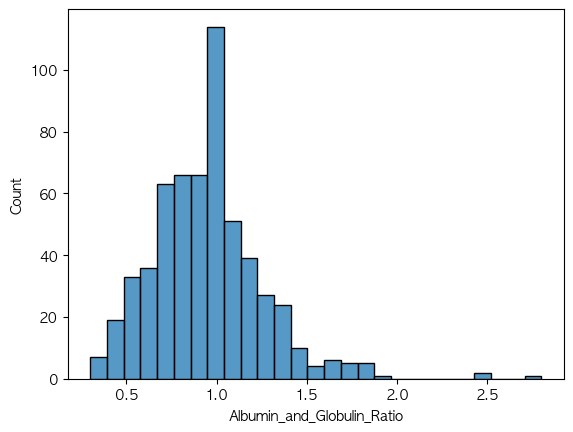

<Axes: xlabel='Dataset', ylabel='Count'>

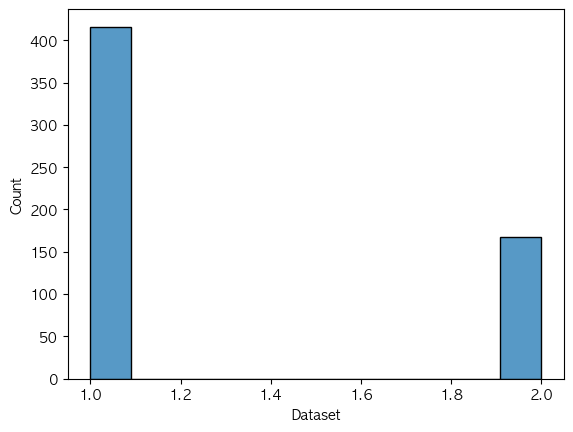

In [8]:
import seaborn as sns

columns = liver_df.columns
columns

for col in columns:
    sns.histplot(liver_df[col])
    plt.show()

### 전처리

In [9]:
indices = liver_df[liver_df['Albumin_and_Globulin_Ratio'].isna()].index
indices

Index([209, 241, 253, 312], dtype='int64')

In [10]:
liver_df.drop(indices, inplace=True)
liver_df.shape
# 삭제 끝

(579, 11)

In [11]:
# 성별도 수치로 바꾸기
# 여자 : 0, 남자 : 1
liver_df['Gender'] = liver_df['Gender'].apply(lambda x: 0 if x=='Female' else 1)
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
# 데이터 확인 작업에서 확인한 데이터 분포가 극단적인 값들은 로그변환
need_to_log = ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase']
liver_df[need_to_log] = np.log1p(liver_df[need_to_log])

In [13]:
feature_data = liver_df.drop('Dataset', axis=1)
label_data = liver_df['Dataset'].replace(2, 0) # 1, 2로 분류된 값을 0, 1로 바꾼다

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    feature_data, label_data, test_size=0.25, stratify=label_data, random_state=1
)

y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Dataset
1    0.714286
0    0.285714
Name: proportion, dtype: float64

Dataset
1    0.717241
0    0.282759
Name: proportion, dtype: float64

In [15]:
# 스케일링 함수
mean = np.mean(feature_data, axis=0)
stddv = np.std(feature_data, axis=0)

def enscale(data, mean, stddv):
    return (data - mean)/stddv

In [16]:
X_train_scaled = enscale(X_train, mean, stddv)
X_train_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
401,0.321921,0.564718,1.432135,1.425117,-1.839005,0.021735,1.508210,0.293722,-1.938290,-2.026406
99,-1.652441,0.564718,-0.710676,-0.782870,0.466870,2.202497,2.056205,0.385998,0.707385,0.478949
211,-0.171670,0.564718,0.340311,0.338567,-0.203032,0.366065,1.233788,0.478274,0.077462,-0.460559
289,0.753812,0.564718,0.876026,0.887447,0.484994,1.141306,0.689085,0.478274,1.085338,1.105288
370,0.568716,-1.770795,2.844333,2.900098,1.568781,-0.400087,-0.355259,1.216483,0.329431,-0.460559


### 학습

In [17]:
# 학습 모델
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
# 학습 결과
y_pred = kn_clf.predict(enscale(X_test, mean, stddv)) # 테스트 값도 scale해서 넣기
y_pred_proba = kn_clf.predict_proba(enscale(X_test, mean, stddv))[:, 1]

In [19]:
from sklearn.metrics import confusion_matrix,precision_score, \
recall_score, accuracy_score, f1_score, roc_curve, auc, roc_auc_score

def get_clf_eval(y_test, y_pred, y_pred_proba):
    print("< Confusion Matrix >")
    print(confusion_matrix(y_test, y_pred))
    
    print("Accuracy : ", end="")
    print(f"{accuracy_score(y_test, y_pred):.4f}", end=", ")
    
    print("Precision : ", end="")
    print(f"{precision_score(y_test, y_pred):.4f}", end=", ")
    
    print("Recall : ", end="")
    print(f"{recall_score(y_test, y_pred):.4f}", end=", ")
    
    print("F1 Score : ", end="")
    print(f"{f1_score(y_test, y_pred):.4f}", end=", ")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    print("AUC of ROC : ", end="")
    print(f"{auc(fpr, tpr):.4f}")

### 평가 지표 출력

In [20]:
get_clf_eval(y_test, y_pred, y_pred_proba)

< Confusion Matrix >
[[18 23]
 [27 77]]
Accuracy : 0.6552, Precision : 0.7700, Recall : 0.7404, F1 Score : 0.7549, AUC of ROC : 0.6449


([<matplotlib.axis.YTick at 0x12ec3a8d0>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

Text(0.5, 0, 'Threshold')

([<matplotlib.axis.XTick at 0x12ec370d0>,
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35'),
  Text(0.4, 0, '0.40'),
  Text(0.45, 0, '0.45'),
  Text(0.5, 0, '0.50'),
  Text(0.55, 0, '0.55'),
  Text(0.6000000000000001, 0, '0.60'),
  Text(0.65, 0, '0.65'),
  Text(0.7000000000000001, 0, '0.70'),
  Text(0.75, 0, '0.75'),
  Text(0.8, 0, '0.80'),
  Text(0.8500000000000001, 0, '0.85'),
  Text(0.9, 0, '0.90'),
  Text(0.9500000000000001, 0, '0.95'),
  Text(1.0, 0, '1.00')])

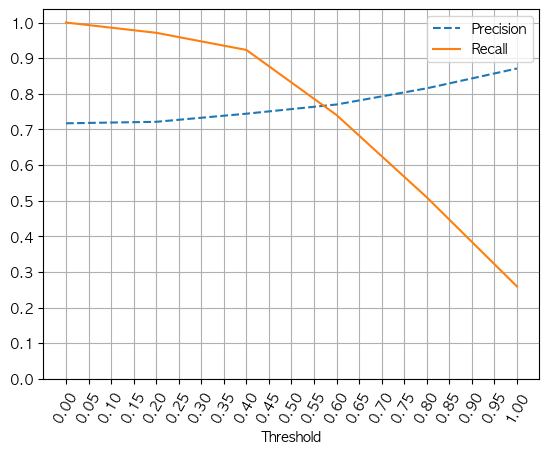

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
lim = len(thresholds)

plt.plot(thresholds, precision[:lim], linestyle='--', label='Precision')
plt.plot(thresholds, recalls[:lim], label='Recall')
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel('Threshold')
plt.xticks(np.linspace(0, 1, 21), rotation=60)
plt.grid(True)
plt.legend(ncol=1)
plt.show()

In [22]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, y_pred_proba, thresholds):
    for custom_threshold in thresholds:
        # binarizer = Binarizer(threshold=custom_threshold).fit(y_pred_proba)
        # custom_predict = binarizer.transform(y_pred_proba)
        custom_predict = Binarizer(threshold=custom_threshold).fit_transform(y_pred_proba)
        print('\n ** Threshold : ', custom_threshold, ' **')
        get_clf_eval(y_test, custom_predict, y_pred_proba)

In [23]:
thresholds = np.linspace(0.2, 0.6, 5)
get_eval_by_threshold(y_test, y_pred_proba.reshape(-1, 1), thresholds)


 ** Threshold :  0.2  **
< Confusion Matrix >
[[ 8 33]
 [ 8 96]]
Accuracy : 0.7172, Precision : 0.7442, Recall : 0.9231, F1 Score : 0.8240, AUC of ROC : 0.6449

 ** Threshold :  0.3  **
< Confusion Matrix >
[[ 8 33]
 [ 8 96]]
Accuracy : 0.7172, Precision : 0.7442, Recall : 0.9231, F1 Score : 0.8240, AUC of ROC : 0.6449

 ** Threshold :  0.4  **
< Confusion Matrix >
[[18 23]
 [27 77]]
Accuracy : 0.6552, Precision : 0.7700, Recall : 0.7404, F1 Score : 0.7549, AUC of ROC : 0.6449

 ** Threshold :  0.5  **
< Confusion Matrix >
[[18 23]
 [27 77]]
Accuracy : 0.6552, Precision : 0.7700, Recall : 0.7404, F1 Score : 0.7549, AUC of ROC : 0.6449

 ** Threshold :  0.6  **
< Confusion Matrix >
[[29 12]
 [51 53]]
Accuracy : 0.5655, Precision : 0.8154, Recall : 0.5096, F1 Score : 0.6272, AUC of ROC : 0.6449


## 결론